In [1]:
from IPython.core.display import HTML
with open('../style.css', 'r') as file:
    css = file.read()
HTML(css)

This notebook contains a test for the function `toNFA`.

In [2]:
%run Regexp-2-NFA.ipynb
%run RegExp-Parser.ipynb

Version 1.0.5


The nb_mypy extension is already loaded. To reload it, use:
  %reload_ext nb_mypy


The `nb_mypy` extension does not work with notebooks that are imported via the `%run`magic.  
Therefore, we have to switch the extension off in this notebook.

In [3]:
%unload_ext nb_mypy

If the regular expression `r` that is defined below is written in the style of the lecture notes, it reads:
$$(\texttt{a}\cdot\texttt{b} + \texttt{b}\cdot\texttt{a})^*$$

In [4]:
r = parse('(ab+ba)*')
r

((('a', '⋅', 'b'), '+', ('b', '⋅', 'a')), '*')

In [5]:
converter = RegExp2NFA({'a', 'b'}) 

We use `converter` to create a non-deterministic <span style="font-variant:small-caps;">Fsm</span> `nfa` that accepts the language 
described by the regular expression `r`.

In [6]:
nfa = converter.toNFA(r) 
nfa

({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 {'a', 'b'},
 {(1, 'a'): {2},
  (3, 'b'): {4},
  (2, '𝜀'): {3},
  (5, 'b'): {6},
  (7, 'a'): {8},
  (6, '𝜀'): {7},
  (9, '𝜀'): {1, 5},
  (4, '𝜀'): {10},
  (8, '𝜀'): {10},
  (11, '𝜀'): {9, 12},
  (10, '𝜀'): {9, 12}},
 11,
 {12})

In [7]:
%run FSM-2-Dot.ipynb

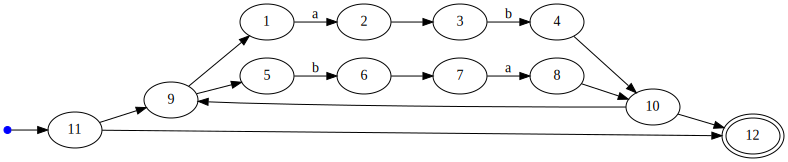

In [8]:
d = nfa2dot(nfa) 
display(d)       

After having constructed a non-deterministic <span style="font-variant:small-caps;">Fsm</span> for the regular expression,
we convert it into a deterministic <span style="font-variant:small-caps;">Fsm</span>.

In [9]:
%run NFA-2-DFA.ipynb

Version 1.0.5


In [10]:
%unload_ext nb_mypy

In [11]:
dfa = nfa2dfa(nfa) 
dfa

({frozenset(),
  frozenset({2, 3}),
  frozenset({6, 7}),
  frozenset({1, 5, 8, 9, 10, 12}),
  frozenset({1, 5, 9, 11, 12}),
  frozenset({1, 4, 5, 9, 10, 12})},
 {'a', 'b'},
 {(frozenset({2, 3}), 'b'): frozenset({1, 4, 5, 9, 10, 12}),
  (frozenset({2, 3}), 'a'): frozenset(),
  (frozenset({6, 7}), 'b'): frozenset(),
  (frozenset({6, 7}), 'a'): frozenset({1, 5, 8, 9, 10, 12}),
  (frozenset({1, 5, 8, 9, 10, 12}), 'b'): frozenset({6, 7}),
  (frozenset({1, 5, 8, 9, 10, 12}), 'a'): frozenset({2, 3}),
  (frozenset({1, 5, 9, 11, 12}), 'b'): frozenset({6, 7}),
  (frozenset({1, 5, 9, 11, 12}), 'a'): frozenset({2, 3}),
  (frozenset(), 'b'): frozenset(),
  (frozenset(), 'a'): frozenset(),
  (frozenset({1, 4, 5, 9, 10, 12}), 'b'): frozenset({6, 7}),
  (frozenset({1, 4, 5, 9, 10, 12}), 'a'): frozenset({2, 3})},
 frozenset({1, 5, 9, 11, 12}),
 {frozenset({1, 5, 8, 9, 10, 12}),
  frozenset({1, 5, 9, 11, 12}),
  frozenset({1, 4, 5, 9, 10, 12})})

In [12]:
d, S = dfa2dot(dfa) 
S

{frozenset({2, 3}): 'S0',
 frozenset({6, 7}): 'S1',
 frozenset({1, 5, 8, 9, 10, 12}): 'S2',
 frozenset({1, 5, 9, 11, 12}): 'S3',
 frozenset(): 'S4',
 frozenset({1, 4, 5, 9, 10, 12}): 'S5'}

Note that the resulting DFA is not minimal, since we can identify some states.

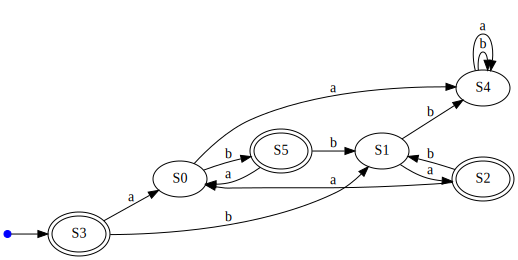

In [13]:
d